In [5]:
path =r"C:\Users\DAI.STUDENTSDC\Desktop\NLP_CV\dataset\headlines.csv"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import pos_tag

In [15]:
from sklearn.cluster import KMeans

In [7]:
df = pd.read_csv(path, header = None)

In [17]:
df.head

<bound method NDFrame.head of                                                       0
0     Budget to set scene for election\n \n Gordon B...
1     Army chiefs in regiments decision\n \n Militar...
2     Howard denies split over ID cards\n \n Michael...
3     Observers to monitor UK election\n \n Minister...
4     Kilroy names election seat target\n \n Ex-chat...
...                                                 ...
2220  India opens skies to competition\n \n India wi...
2221  Yukos bankruptcy 'not US matter'\n \n Russian ...
2222  Survey confirms property slowdown\n \n Governm...
2223  High fuel prices hit BA's profits\n \n British...
2224  US trade gap hits record in 2004\n \n The gap ...

[2225 rows x 1 columns]>

In [37]:
print(df[0][0])

Budget to set scene for election
 
 Gordon Brown will seek to put the economy at the centre of Labour's bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from Â£60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.
 
 Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about Â£2bn to spare.
 
 - Increase in the stamp duty threshold from Â£60,000 
  - A freeze on petrol duty 
  - An extension of tax credit scheme for poorer families 
  - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties' general election manifestos. Ten years ago, buyers had a much greater chanc

### defining data preprocessing functions

In [92]:
def lemmatize(word):
    lemma = WordNetLemmatizer()
    
    tag = pos_tag([word]) # outputs [(a,b)], where a is word and b is pos
    if tag[0][1].startswith('N'):
        pos = 'n'
    elif tag[0][1].startswith('V'):
        pos = 'v'
    elif tag[0][1].startswith('J'):
        pos = 'a'
    elif tag[0][1].startswith('R'):
        pos = 'r'
    else:
        pos = 'n'
    return (lemma.lemmatize(word.lower(), pos = pos))

In [257]:
swords = stopwords.words('english')
swords.append('said') # appended `said` in swords because it appears almost on every news so this word has no significance in predicting the label

In [259]:
import string
def clean_text(sent):
    tokens = word_tokenize(sent.lower())
    tokens1 = [word for word in tokens if word not in string.punctuation and len(word) > 2]
    tokens2 = [word for word in tokens1 if word not in stopwords.words('english')]
    tokens4 = [lemmatize(word) for word in tokens2]
    return tokens4

In [181]:
# create the cleaned data and plot the wordcloud

In [198]:
cleaned = ''
for i in range(2225):
    cleaned += ' '.join(clean_text(df[0][i])) # df[columns][row]

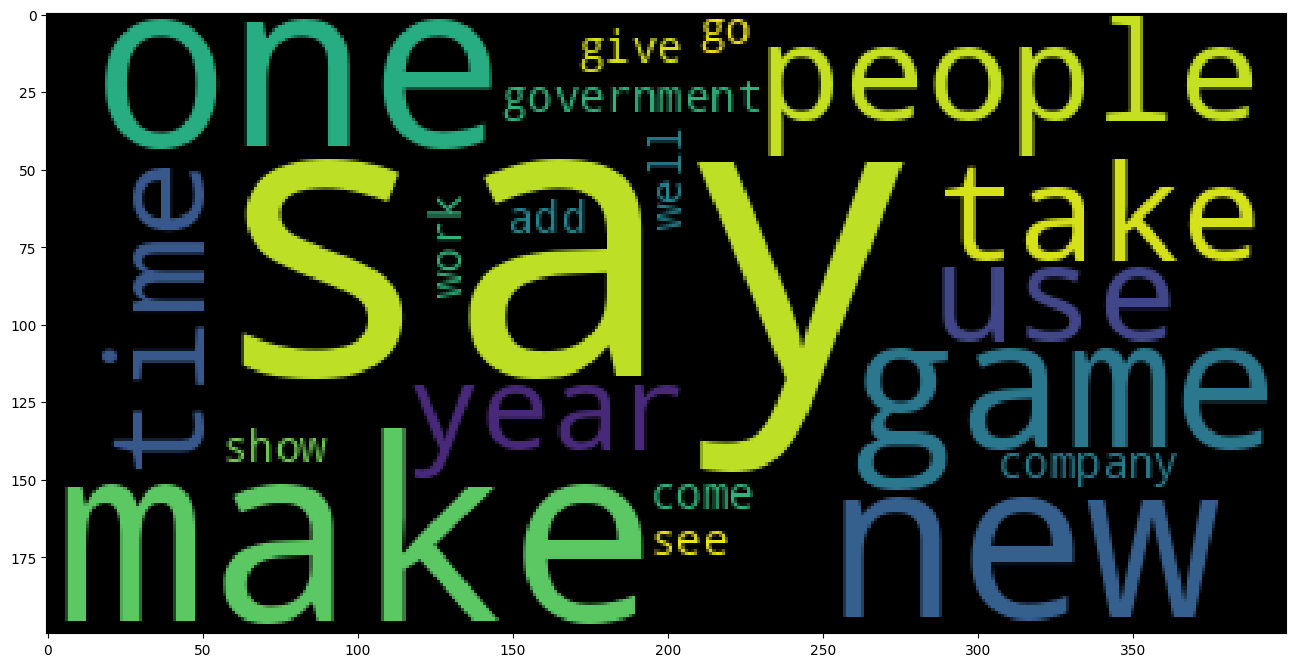

In [199]:
wordcloud = WordCloud(background_color = 'black', max_words = 20).generate(cleaned)
plt.figure(figsize = (16, 9))
plt.imshow(wordcloud);

In [200]:
del(cleaned)
del(wordcloud)

In [201]:
cleaned = df[0].apply(clean_text)

In [206]:
cleaned

0       [budget, set, scene, election, gordon, brown, ...
1       [army, chief, regiment, decision, military, ch...
2       [howard, denies, split, card, michael, howard,...
3       [observer, monitor, election, minister, invite...
4       [kilroy, name, election, seat, target, ex-chat...
                              ...                        
2220    [india, open, sky, competition, india, allow, ...
2221    [yukos, bankruptcy, 'not, matter, russian, aut...
2222    [survey, confirms, property, slowdown, governm...
2223    [high, fuel, price, hit, profit, british, airw...
2224    [trade, gap, hit, record, 2004, gap, export, i...
Name: 0, Length: 2225, dtype: object

In [210]:
cleaned.values[0]

array([list(['budget', 'set', 'scene', 'election', 'gordon', 'brown', 'seek', 'put', 'economy', 'centre', 'labour', 'bid', 'third', 'term', 'power', 'delivers', 'ninth', 'budget', '1230', 'gmt', 'expect', 'stress', 'importance', 'continued', 'economic', 'stability', 'low', 'unemployment', 'interest', 'rate', 'chancellor', 'expect', 'freeze', 'petrol', 'duty', 'raise', 'stamp', 'duty', 'threshold', 'â£60,000', 'conservative', 'lib', 'dems', 'insist', 'voter', 'face', 'high', 'tax', 'means-testing', 'labour', 'treasury', 'official', 'say', 'pre-election', 'giveaway', 'brown', 'thought', 'â£2bn', 'spare', 'increase', 'stamp', 'duty', 'threshold', 'â£60,000', 'freeze', 'petrol', 'duty', 'extension', 'tax', 'credit', 'scheme', 'poorer', 'family', 'possible', 'help', 'pensioner', 'stamp', 'duty', 'threshold', 'rise', 'intend', 'help', 'first', 'time', 'buyer', 'likely', 'theme', 'three', 'main', 'party', 'general', 'election', 'manifesto', 'ten', 'year', 'ago', 'buyer', 'much', 'great', 'cha

In [187]:
cleaned = cleaned.values[0]

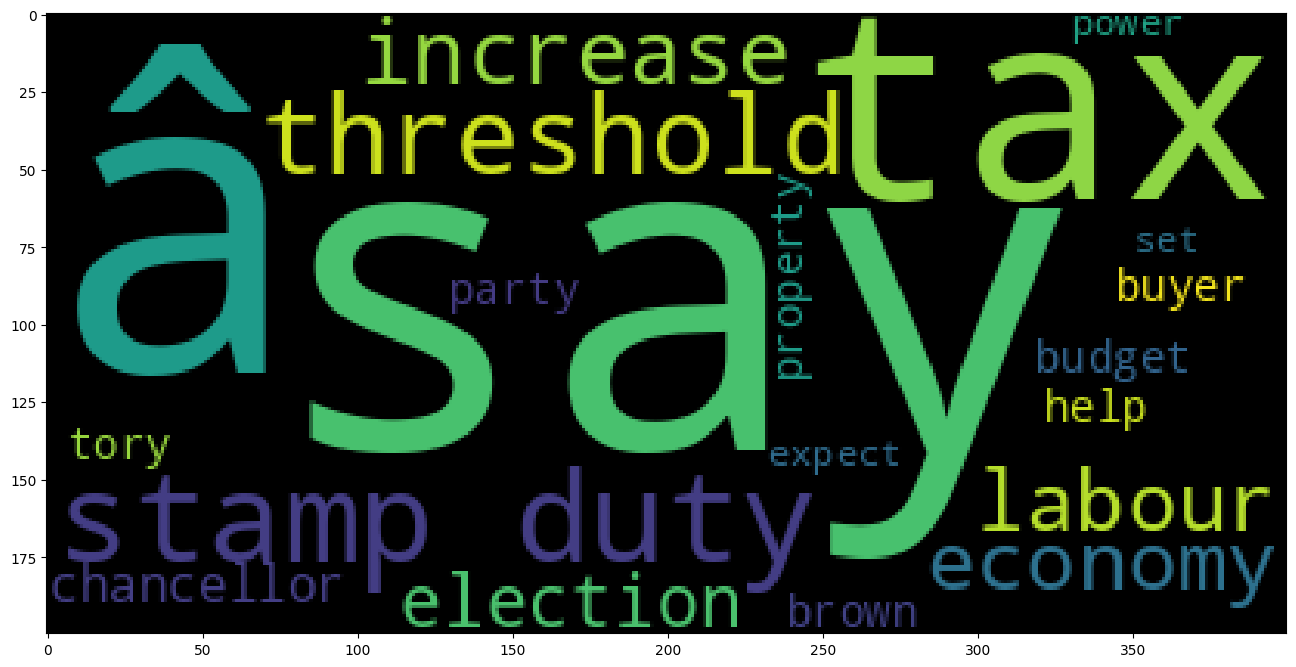

In [188]:
wordcloud = WordCloud(background_color = 'black', max_words = 20).generate(' '.join(cleaned))
plt.figure(figsize = (16, 9))
plt.imshow(wordcloud);

### TF*IDF vectorizer

In [261]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [263]:
tfidf = TfidfVectorizer(analyzer = clean_text)

In [265]:
x_new = tfidf.fit_transform(df[0]) 

In [266]:
x_new.shape

(2225, 28318)

In [267]:
from sklearn.cluster import KMeans

In [268]:
km = KMeans(random_state =0) # n_clustersint, default=8
labels = km.fit_predict(x_new)

In [269]:
labels

array([4, 6, 4, ..., 2, 2, 5])

In [270]:
km.inertia_ # sum squared eroor

2077.7567952908416

In [271]:
# When features are very high like in nlp 'text' that time elbow method is not very much accurate

In [273]:
sse = [] # Total sum squared eroor
for k in range(1, 16):
    km = KMeans(n_clusters = k, random_state = 0, n_init = 'auto')
    km.fit_predict(x_new)
    sse.append(km.inertia_) # km.inertia_ gives the within-cluster sum of squared distances

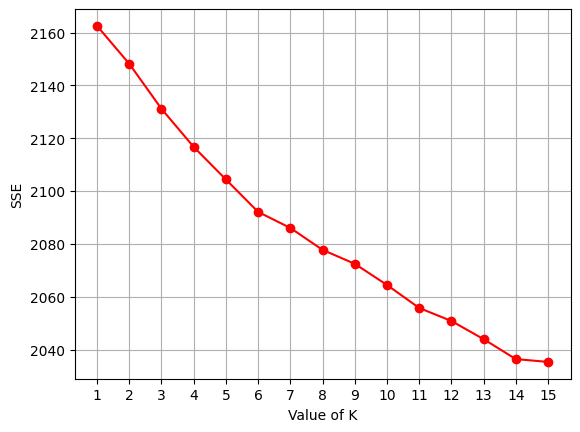

In [274]:
plt.xlabel('Value of K')
plt.ylabel('SSE')
plt.grid()
plt.xticks(range(1, 16))
plt.plot(range(1, 16), sse, marker = 'o', color ='r')

### create the cluseters

In [304]:
km = KMeans(n_clusters = 5, n_init = 'auto', random_state = 0)
labels = km.fit_predict(x_new)
labels

array([4, 4, 4, ..., 3, 3, 3])

### seprate the clusters

In [307]:
zero = df[labels == 0]
one = df[labels == 1]
two = df[labels == 2]
three = df[labels == 3]
four = df[labels == 4]

In [318]:
print('Cluster-0:', len(zero))
print('Cluster-1:', len(one))
print('Cluster-2:', len(two))
print('Cluster-3:', len(three))
print('Cluster-4:', len(four))

Cluster-0: 361
Cluster-1: 223
Cluster-2: 539
Cluster-3: 495
Cluster-4: 607


In [330]:
zero.reset_index(inplace = True)
one.reset_index(inplace = True)
two.reset_index(inplace = True)
three.reset_index(inplace = True)
four.reset_index(inplace = True)

In [344]:
z_cleaned = ''
for i in range(361):
    z_cleaned += ' '.join(clean_text(zero[0][i]))

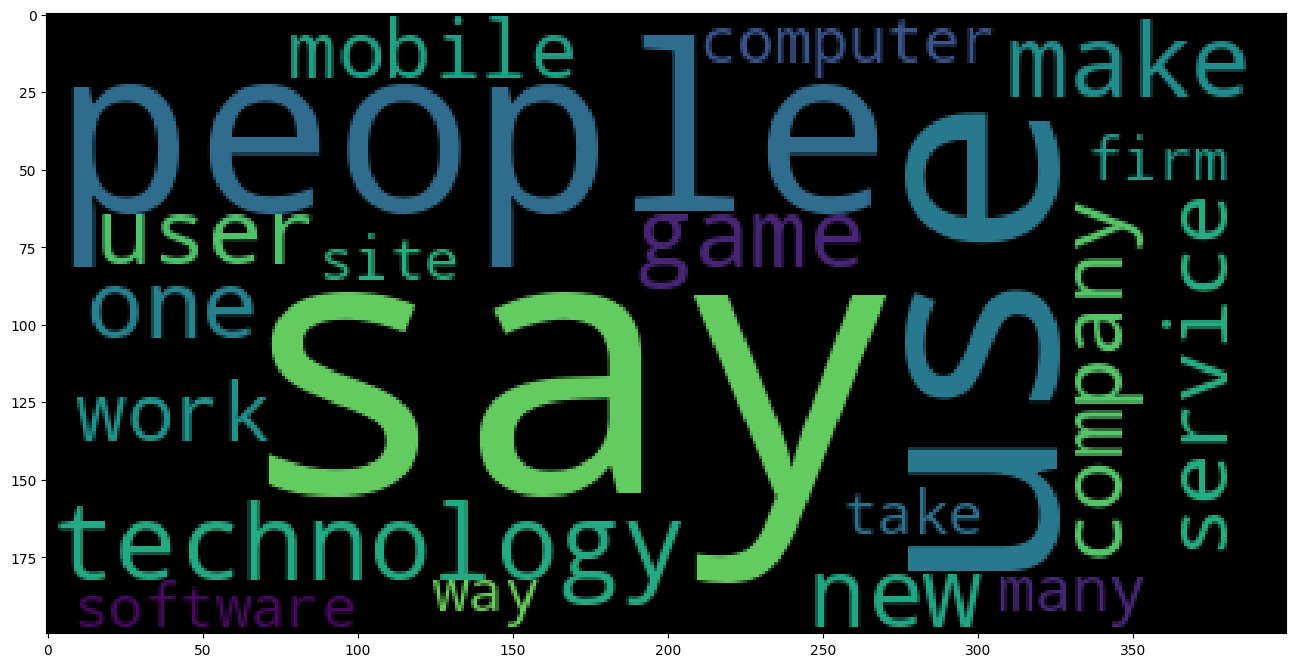

In [345]:
wordcloud = WordCloud(background_color = 'black', max_words = 20).generate(z_cleaned)
plt.figure(figsize = (16, 9))
plt.imshow(wordcloud);

In [355]:
from nltk import FreqDist
new = ' '.join(zero[0])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
freq.most_common(10)

[('people', 848),
 ('also', 481),
 ('Mr', 471),
 ('technology', 461),
 ('would', 433),
 ('new', 423),
 ('could', 423),
 ('mobile', 421),
 ('music', 397),
 ('users', 364)]

In [365]:
class_name = {0 : 'Technology'}

In [340]:
o_cleaned = ''
for i in range(one.shape[0]):
    o_cleaned += ' '.join(clean_text(one[0][i]))

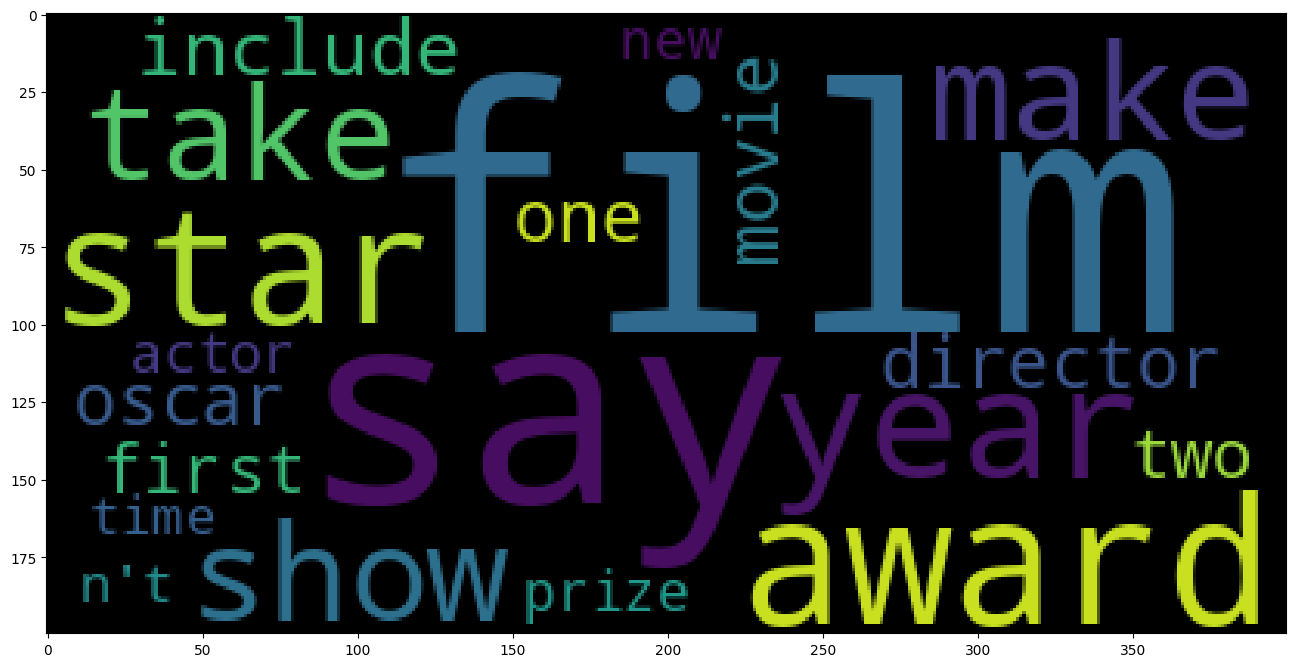

In [342]:
wordcloud = WordCloud(background_color = 'black', max_words = 20).generate(o_cleaned)
plt.figure(figsize = (16, 9))
plt.imshow(wordcloud);

In [357]:
from nltk import FreqDist
new = ' '.join(one[0])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
freq.most_common(10)

[('film', 650),
 ('best', 533),
 ('year', 247),
 ('also', 238),
 ('award', 189),
 ('director', 184),
 ('films', 183),
 ('awards', 182),
 ('actor', 166),
 ('US', 164)]

In [367]:
class_name[1] = 'Entertainment'

In [351]:
t_cleaned = ''
for i in range(two.shape[0]):
    t_cleaned += ' '.join(cle                 an_text(two[0][i]))

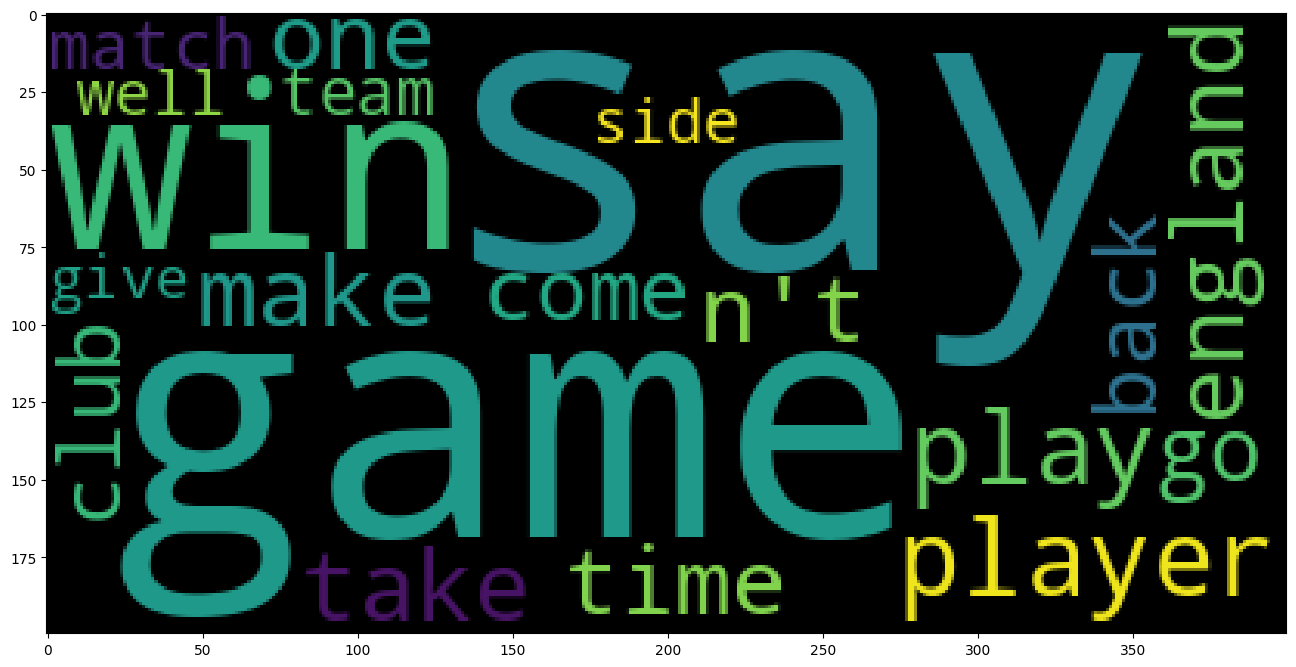

In [359]:
wordcloud = WordCloud(background_color = 'black', max_words = 20).generate(t_cleaned)
plt.figure(figsize = (16, 9))
plt.imshow(wordcloud);

In [361]:
from nltk import FreqDist
new = ' '.join(two[0])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
freq.most_common(10)

[('game', 585),
 ('England', 464),
 ('would', 451),
 ('first', 449),
 ('win', 411),
 ('last', 389),
 ('time', 377),
 ('one', 359),
 ('two', 356),
 ('also', 354)]

In [386]:
class_name[2] = 'sports'

In [363]:
thr_cleaned = ''
for i in range(three.shape[0]):
    thr_cleaned += ' '.join(clean_text(three[0][i]))

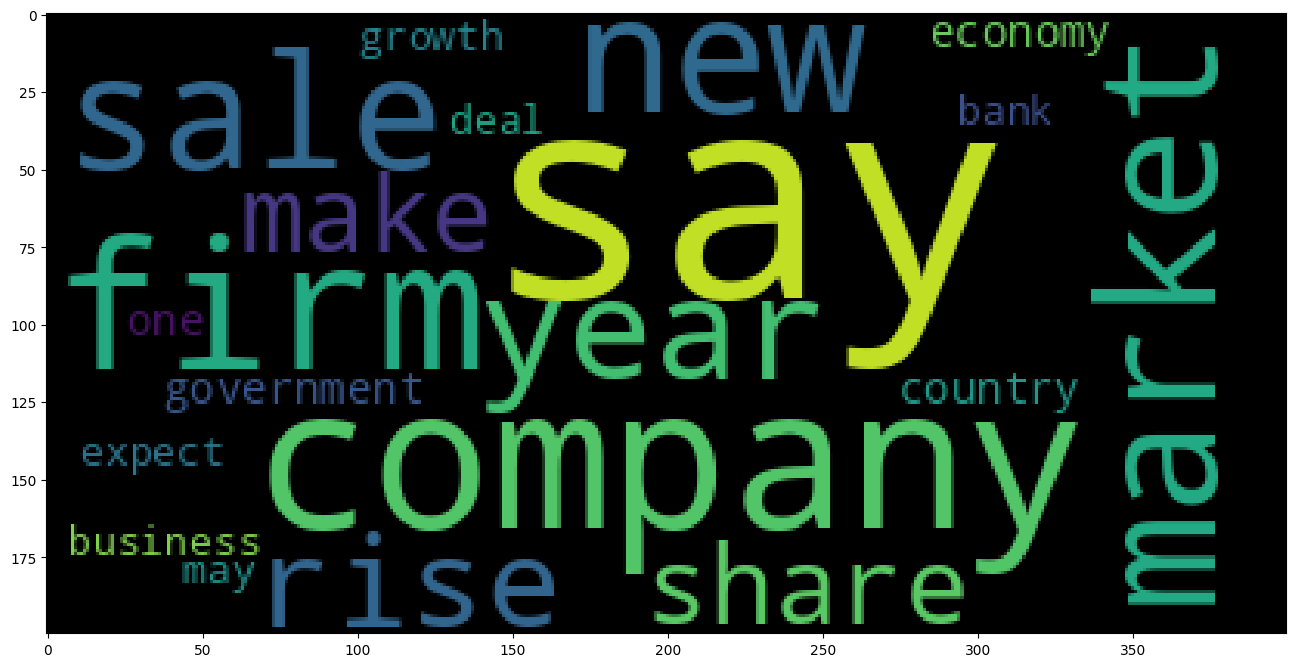

In [369]:
wordcloud = WordCloud(background_color = 'black', max_words = 20).generate(thr_cleaned)
plt.figure(figsize = (16, 9))
plt.imshow(wordcloud);

In [371]:
from nltk import FreqDist
new = ' '.join(three[0])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
freq.most_common(10)

[('US', 782),
 ('year', 636),
 ('Mr', 511),
 ('market', 421),
 ('company', 420),
 ('also', 419),
 ('would', 417),
 ('growth', 367),
 ('firm', 353),
 ('economy', 350)]

In [375]:
class_name[3] = 'finance'

In [377]:
f_cleaned = ''
for i in range(four.shape[0]):
    f_cleaned += ' '.join(clean_text(four[0][i]))

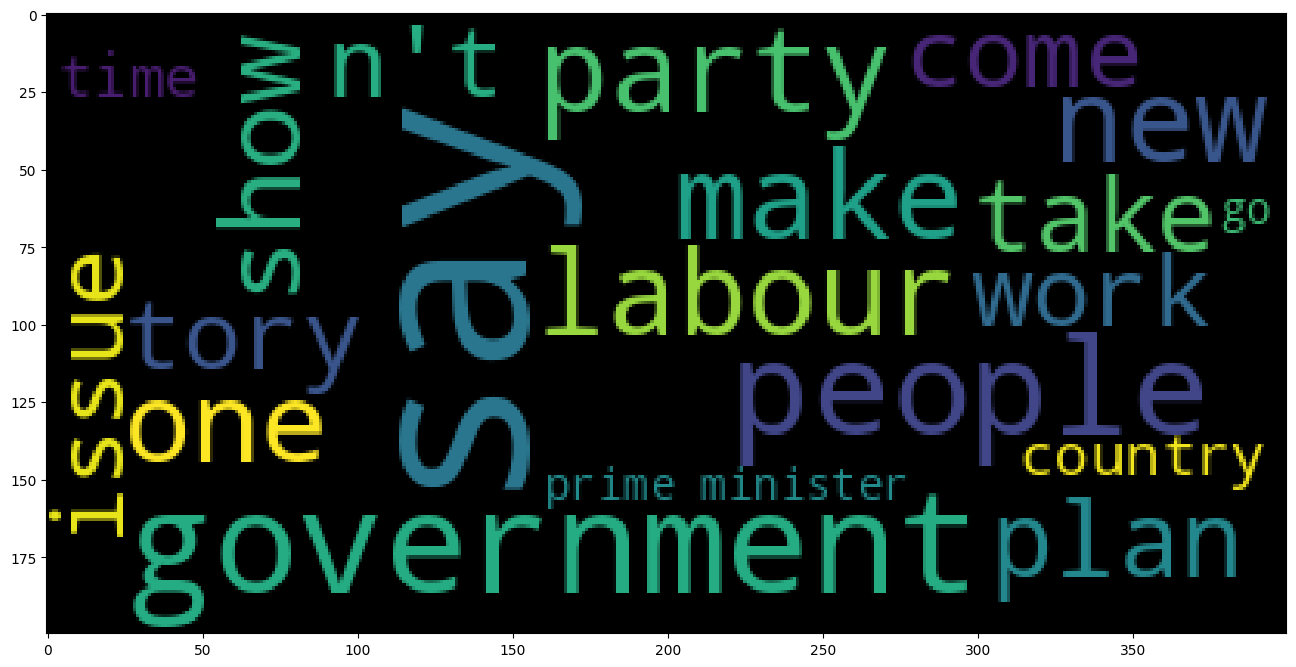

In [379]:
wordcloud = WordCloud(background_color = 'black', max_words = 20).generate(f_cleaned)
plt.figure(figsize = (16, 9))
plt.imshow(wordcloud);

In [382]:
from nltk import FreqDist
new = ' '.join(four[0])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
freq.most_common(10)

[('Mr', 1820),
 ('would', 1228),
 ('government', 768),
 ('Labour', 758),
 ('people', 721),
 ('also', 610),
 ('Blair', 586),
 ('election', 560),
 ('could', 478),
 ('new', 466)]

In [384]:
class_name[4] = 'uk_politics'

In [390]:
class_name

{0: 'Technology',
 1: 'Entertainment',
 3: 'finance',
 4: 'uk_politics',
 2: 'sports'}